In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from joblib import dump, load
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

test/train set

In [4]:
dataset=pd.read_csv('twitter_training.csv',header=None)
dataset.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
files=['twitter_training.csv','twitter_validation.csv']
#train set
dataset_train=pd.read_csv(files[0],header=None)
dataset_train.drop(0,inplace=True,axis=1)
dataset_train.drop(1,inplace=True,axis=1)
titel=['sentiment','tweet']
dataset_train.columns=titel
dataset
dataset_train['sentiment']=dataset_train['sentiment'].replace({'Positive':1, 'Neutral': 0, 'Negative': 2})
dataset_train.head(100)
dataset_train=dataset_train[dataset_train['sentiment']!= 'Irrelevant']
#test set
dataset_test=pd.read_csv(files[1],header=None)
dataset_test.drop(0,inplace=True,axis=1)
dataset_test.drop(1,inplace=True,axis=1)
titel=['sentiment','tweet']
dataset_test.columns=titel
dataset
dataset_test['sentiment']=dataset_test['sentiment'].replace({'Positive':1, 'Neutral': 0, 'Negative': 2})
dataset_test.head(100)
dataset_test=dataset_test[dataset_test['sentiment']!= 'Irrelevant']






In [6]:
#clean Data
from nltk.stem import PorterStemmer
import pandas as pd
import re
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
nltk.download('words')
english_words = set(words.words())
stemmer=PorterStemmer()
# Define the patterns you want to remove
pattern = '[^a-z|A-Z|\s]|a{2,}|\s{2,}|â|Â|\n'
big_data=[dataset_train,dataset_test]
for data in big_data :
  for i in range(len(data)):
      try :
          #match unneeded words from text and substitute them with ""
          matched=re.findall(pattern,data['tweet'][i])
          cleaned_text = re.sub(pattern, "", data['tweet'][i])
          #nlp=spacy.blank("en")
          #doc=nlp(cleaned_text)  #split cleaned data into words and check for stop/english words
          filtered_words = []
          cleaned_list=cleaned_text.split(' ')
          for token in cleaned_list:
            stemmer.stem(token) # derive stem of words
            filtered_words.append(token)
          data['tweet'][i] = ' '.join(filtered_words)
          if data['tweet'][i]=='' or data['tweet'][i]==' '  :
              #print("true")
              data=data.drop(data[i]) #get rid of empty lines
      except:
          pass
print(dataset_test)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


    sentiment                                              tweet
1           0  BBC News  Amazon boss Jeff Bezos rejects claim...
2           2  Microsoft Why do I pay for WORD when it functi...
3           2  CSGO matchmaking is so full of closet hacking ...
4           0  Now the President is slapping Americans in the...
5           2  Hi EAHelp Ive had Madeleine McCann in my cella...
..        ...                                                ...
993         2  Please explain how this is possible! How can t...
994         1  Good on Sony. As much as I want to see the new...
997         1  Today sucked so it’s time to drink wine n play...
998         1  Bought a fraction of Microsoft today. Small wins.
999         0  Johnson & Johnson to stop selling talc baby po...

[828 rows x 2 columns]


In [7]:
nan_indices = dataset_train['sentiment'].index[dataset_train['sentiment'].isna()]
print(nan_indices)
dataset_train.drop(nan_indices, inplace=True)
nan_indices = dataset_train['tweet'].index[dataset_train['tweet'].isna()]
print(nan_indices)
dataset_train.drop(nan_indices, inplace=True)
nan_indices = dataset_test['sentiment'].index[dataset_test['sentiment'].isna()]
print(nan_indices)
dataset_test.drop(nan_indices, inplace=True)
nan_indices = dataset_test['tweet'].index[dataset_test['tweet'].isna()]
print(nan_indices)
dataset_test.drop(nan_indices, inplace=True)
data = pd.concat([dataset_train, dataset_test], ignore_index=True)



Int64Index([], dtype='int64')
Int64Index([   61,   553,   589,   745,  1105,  1106,  2413,  2929,  2983,
             2997,
            ...
            73761, 73762, 73763, 73855, 73971, 73972, 73973, 74421, 74422,
            74423],
           dtype='int64', length=571)
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


Bayes for test/train sets


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

v = CountVectorizer()
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X=data['tweet']
y=data['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer
vectorizer = CountVectorizer()
X_train_cv=vectorizer.fit_transform(X_train)
X_test_cv=vectorizer.transform(X_test)

# Now, you can fit the model
model = MultinomialNB(alpha=0,fit_prior=False)
model.fit(X_train_cv, y_train.astype('int'))



/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


MultinomialNB(alpha=0, fit_prior=False)

In [9]:
y_pred = model.predict(X_test_cv)



print(classification_report(y_test.astype(int), y_pred.astype(int)))
accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3635
           1       0.84      0.86      0.85      4237
           2       0.84      0.87      0.85      4518

    accuracy                           0.84     12390
   macro avg       0.85      0.84      0.84     12390
weighted avg       0.85      0.84      0.84     12390

Accuracy: 0.8447941888619854


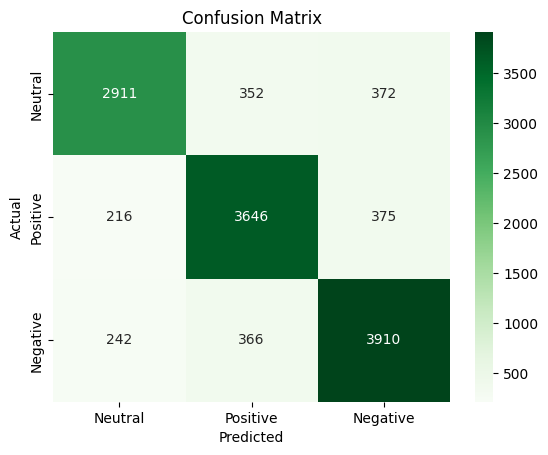

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Compute the confusion matrix
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Neutral', 'Positive','Negative'],
            yticklabels=['Neutral', 'Positive','Negative'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion Matrix Bayesian: 0.84 ACC.png")
plt.show()


In [11]:
pip install scikit-learn tabulate fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=e0599618169c43de75089608f78b529c41e6a4411ae4e47662e67a56cdf03136
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


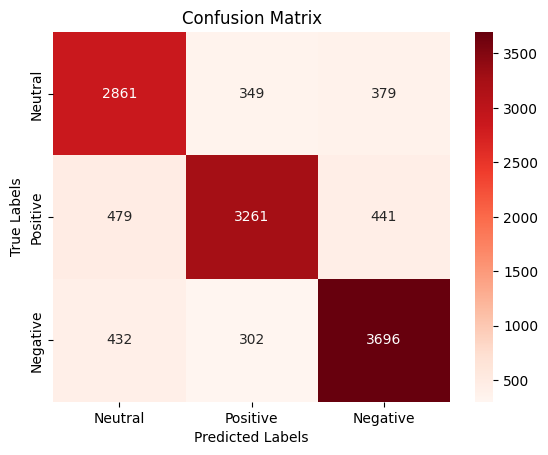

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Provided confusion matrix
conf_matrix = [[2861, 349, 379], [479, 3261, 441], [432, 302, 3696]]

# Create the confusion matrix plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix LSTM model 0.8 ACC.png')
plt.show()


In [13]:
from sklearn.metrics import classification_report
from fpdf import FPDF
report=classification_report(y_test.astype(int), y_pred.astype(int))

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.multi_cell(0, 10, "Classification Report")
pdf.ln()
pdf.multi_cell(0, 10, report)

pdf_filename = "classification_report_bayes.pdf"
pdf.output(pdf_filename)

''